### What is Chi_Distribution?

Chi-Distribution is related to F-distribution. I was originally studying F-distribution because F-test is used for testing joint hypothesis. And F-Distribution is a derivation of Chi-Distribution. So I decided to take a closer look at Chi-Distribution. And this note will eventually lead to the exploration of F-distribution. Of course, Chi-Distribution itself is used for certain tests. But that's not my main goal here. The exploration of Chi-Distribution in here will only be used as a pre-step for understanding F-distribution.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

Here, I made a function that generates an array of Chi-Distribution. I could have easily generated a Chi-Distribution using a statistical module, but I was actually interested how Chi-Distribution works. And I found that Chi-Distribution is actually made up of Z-distribution. 

In [2]:
def chi_square_dist(df):
    z_dist_list = []
    for i in range(df):
        z_squared = np.square(np.random.normal(0,1,8000))
        z_dist_list.append(z_squared)
    
    return np.sum(np.array(z_dist_list), axis=0) 

#This is an alternative of getting chisquare distribution.
#np.random.chisquare(df,size)

As you can see from the plot below, as the degrees of freedom increases, the Chi-Distribution looks more like a Normal Distribution. It starts to get more normal with bigger standard deviation. 

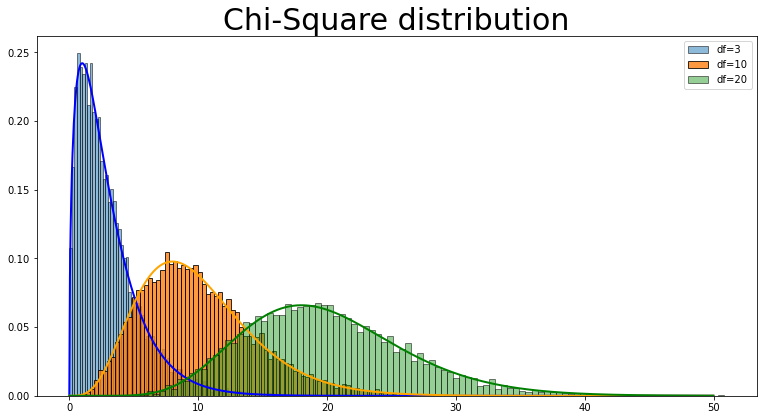

In [3]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 50, .05)

ax_1.hist(chi_square_dist(3), bins=100, ec="black", label="df=3", alpha=0.5, density=True)
ax_1.plot(x, stats.chi2.pdf(x, df=3), color='blue', lw=2)


ax_1.hist(chi_square_dist(10), bins=100, ec="black", label="df=10", alpha=0.8, density=True)
ax_1.plot(x, stats.chi2.pdf(x, df=10), color='orange', lw=2)

ax_1.hist(chi_square_dist(20), bins=100, ec="black", label="df=20", alpha=0.5, density=True)
ax_1.plot(x, stats.chi2.pdf(x, df=20), color='green', lw=2)


ax_1.set_title("Chi-Square distribution", fontsize=30)


plt.legend()
plt.show()

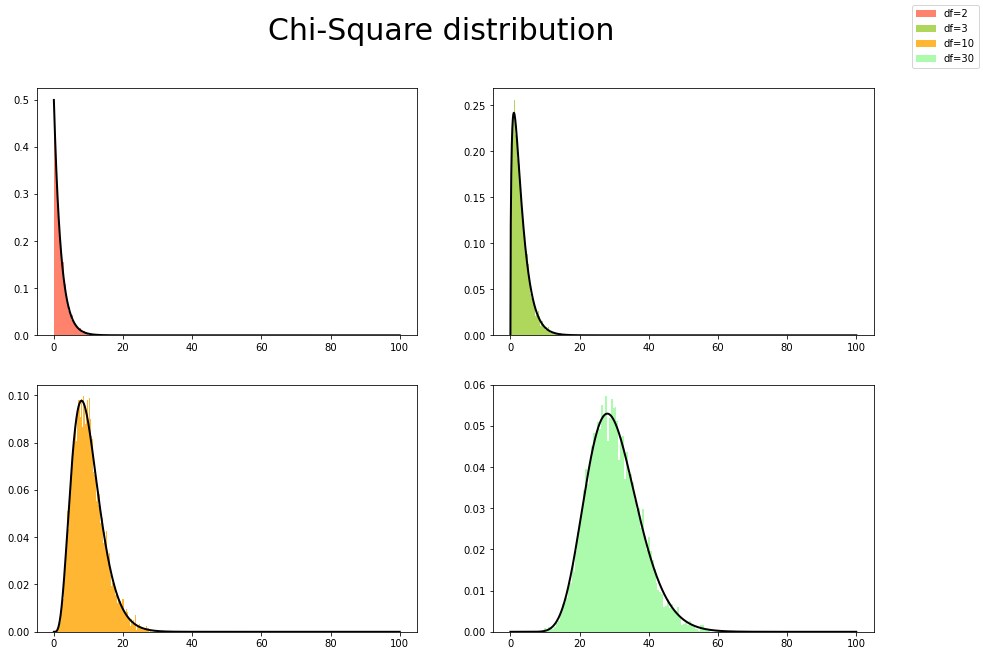

In [4]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

x = np.arange(0, 100, .05)

axes[0,0].hist(chi_square_dist(2), bins=100, label="df=2", color="tomato", alpha=0.8, density=True)
axes[0,0].plot(x, stats.chi2.pdf(x, df=2), color='black', lw=2)

axes[0,1].hist(chi_square_dist(3), bins=100, label="df=3", color="yellowgreen", alpha=0.8, density=True)
axes[0,1].plot(x, stats.chi2.pdf(x, df=3), color='black', lw=2)

axes[1,0].hist(chi_square_dist(10), bins=100, label="df=10", color="orange", alpha=0.8, density=True)
axes[1,0].plot(x, stats.chi2.pdf(x, df=10), color='black', lw=2)

axes[1,1].hist(chi_square_dist(30), bins=100, label="df=30", color="palegreen", alpha=0.8, density=True)
axes[1,1].plot(x, stats.chi2.pdf(x, df=30), color='black', lw=2)


plt.suptitle("Chi-Square distribution", fontsize=30)

figure.legend()
plt.show()

### What is F-Distribution? 


F-Distribution is another distribution. It's hard to describe it's distinctness from the Chi-Distribution. Here, this is a function that generates a F-Distribution. It takes two inputs. One is a degrees of freedom for the numerator, and the other for the denominator. 

In [5]:
def f_dist(df1, df2):
    numerator = chi_square_dist(df1)/df1 
    denominator = chi_square_dist(df2)/df2
    
    f_dist = numerator / denominator 
    
    return f_dist

# This is an alternative of getting f-distribution.
#np.random.f(df_num,df_denom,size)

The plots below are the demonstrations of F-Distribution. I have compared what happens when one degrees of freedom increases while fixing another. 

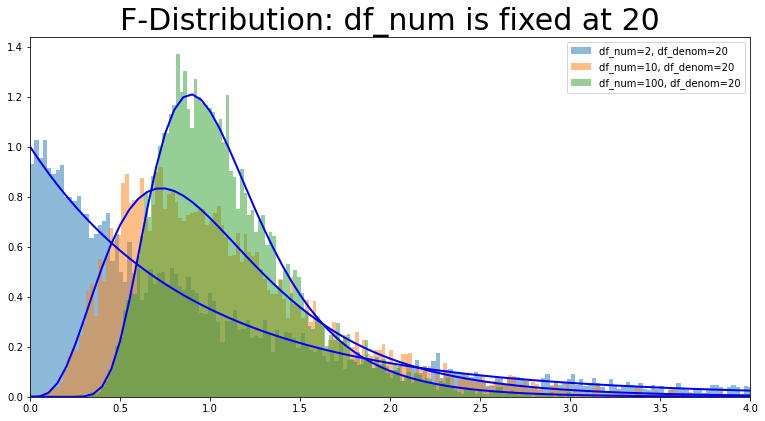

In [6]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 100, .05)

ax_1.hist(f_dist(2,20), bins=500, label="df_num=2, df_denom=20", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 2, 20), color='blue', lw=2)

ax_1.hist(f_dist(10,20), bins=300, label="df_num=10, df_denom=20", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 10, 20), color='blue', lw=2)

ax_1.hist(f_dist(100,20), bins=200, label="df_num=100, df_denom=20", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 100, 20), color='blue', lw=2)


plt.xlim(0,4)

ax_1.set_title("F-Distribution: df_num is fixed at 20", fontsize=30)


plt.legend()
plt.show()

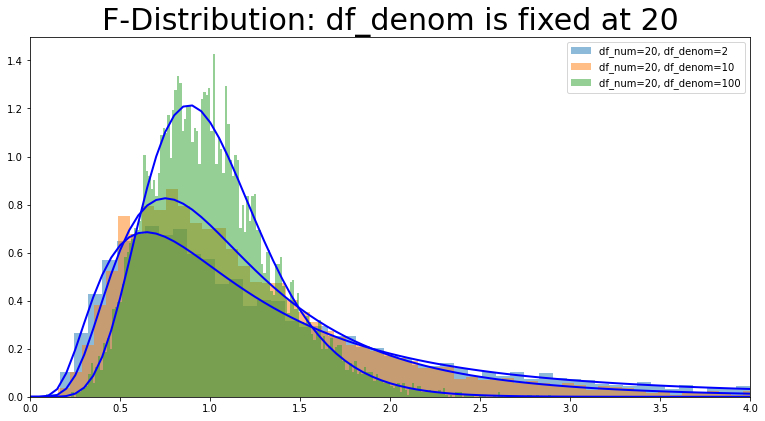

In [7]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 100, .05)

ax_1.hist(f_dist(20,5), bins=1000, label="df_num=20, df_denom=2", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 20, 5), color='blue', lw=2)

ax_1.hist(f_dist(20,10), bins=300, label="df_num=20, df_denom=10", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 20, 10), color='blue', lw=2)

ax_1.hist(f_dist(20,100), bins=200, label="df_num=20, df_denom=100", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 20, 100), color='blue', lw=2)


plt.xlim(0,4)

ax_1.set_title("F-Distribution: df_denom is fixed at 20", fontsize=30)


plt.legend()
plt.show()

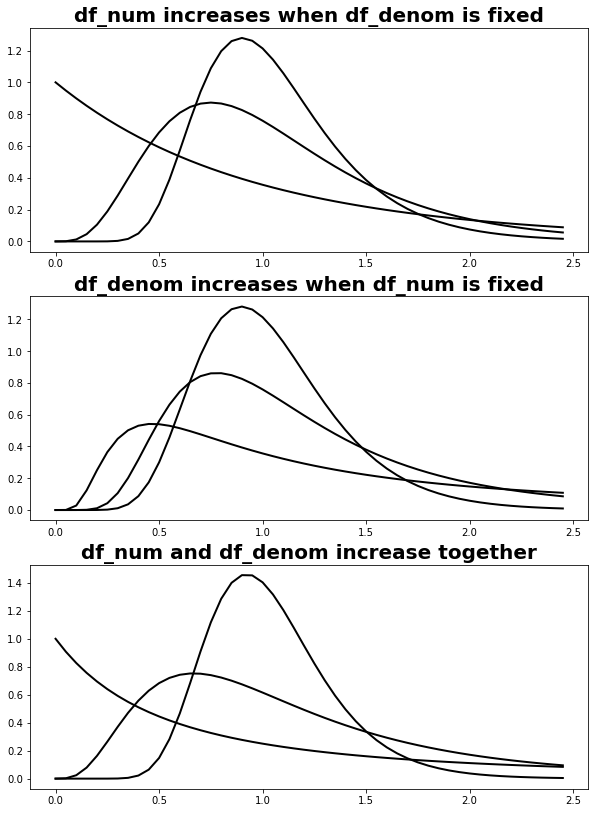

In [8]:
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,14))

x = np.arange(0, 2.5, .05)
v = 30 

# fix df_num
axes[0].plot(x, stats.f.pdf(x,2,v), color='black', lw=2)
axes[0].plot(x, stats.f.pdf(x,10,v), color='black', lw=2)
axes[0].plot(x, stats.f.pdf(x,50,v), color='black', lw=2)
axes[0].set_title("df_num increases when df_denom is fixed", fontsize=20, weight="bold")

# fix df_denom
axes[1].plot(x, stats.f.pdf(x,v,2), color='black', lw=2)
axes[1].plot(x, stats.f.pdf(x,v,10), color='black', lw=2)
axes[1].plot(x, stats.f.pdf(x,v,50), color='black', lw=2)
axes[1].set_title("df_denom increases when df_num is fixed", fontsize=20, weight="bold")


# increase both df_num and df_denom
axes[2].plot(x, stats.f.pdf(x,2,2), color='black', lw=2)
axes[2].plot(x, stats.f.pdf(x,10,10), color='black', lw=2)
axes[2].plot(x, stats.f.pdf(x,50,50), color='black', lw=2)
axes[2].set_title("df_num and df_denom increase together", fontsize=20, weight="bold")

plt.show()